In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline 
import seaborn as sn


In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

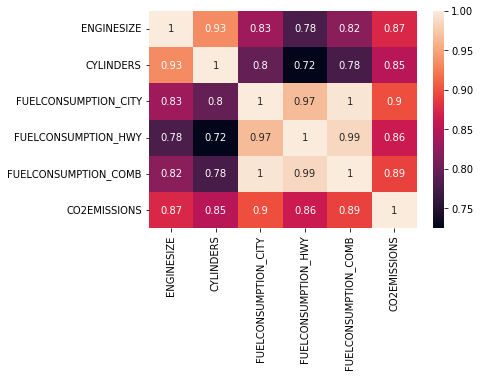

In [14]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
hCorr = cdf.corr()

sn.heatmap(data=hCorr,annot=True)
pl.plot

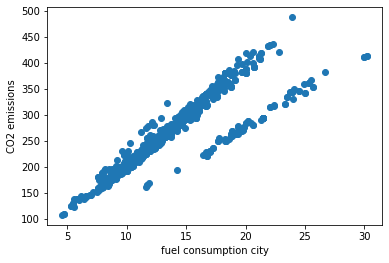

In [17]:
pl.scatter(cdf['FUELCONSUMPTION_CITY'],cdf['CO2EMISSIONS'])
pl.xlabel('fuel consumption city')
pl.ylabel('CO2 emissions')
pl.show()


In [22]:
#split the train and test dataset

splitnum = np.random.rand(len(cdf)) < 0.9
train = cdf[splitnum]
test = cdf[~splitnum]
print("length of training data", len(train))
print("length of testing data", len(test))


length of training data 962
length of testing data 105


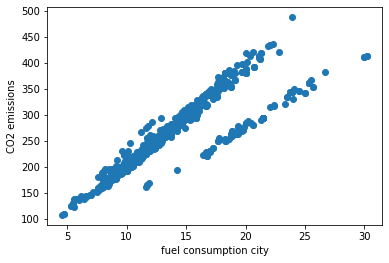

In [24]:
pl.scatter(train['FUELCONSUMPTION_CITY'],train['CO2EMISSIONS'])
pl.xlabel('fuel consumption city')
pl.ylabel('CO2 emissions')
pl.show()


In [32]:
#Multiple Linear Regression Model
from sklearn import linear_model
mulregModel = linear_model.LinearRegression()
xtrain = train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
ytrain = train['CO2EMISSIONS']
mulregModel.fit(xtrain,ytrain)


print("coefficient is ",mulregModel.coef_)
print("intercept is ",mulregModel.intercept_)



coefficient is  [11.45983844  6.70263102  6.05124     3.27469506]
intercept is  67.14293533515126


In [31]:
y_hat = mulregModel.predict(xtrain)


# lets look at the Sum of residual errors & variance (R squared)

#sum of residual error 

mse = np.mean((y_hat - ytrain)**2)
print(mse)

#variance

rSquared = mulregModel.score(xtrain,ytrain)
print("variance is %.2f" %(rSquared))



540.8978961020665
variance is 0.86
